In [1]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
% matplotlib inline

/Users/MatthewBarnette/final_project_2/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [58]:
crime_in_sf = pd.read_csv('SF_crime/train.csv')
crime_in_sf.Dates = pd.to_datetime(crime_in_sf.Dates)

test_pred = pd.read_csv('/Users/MatthewBarnette/final_project_predictions/test_results_top_three.csv')
test_pred.Dates = pd.to_datetime(test_pred.Dates)

test_pred_500000_dec = test_pred.sort('Dates', ascending=False).head(500000)
test_pred_500000_asc = test_pred.sort('Dates').head(500000)

test_pred_500000_asc.to_csv('/Users/MatthewBarnette/final_project_predictions/500000_asc.csv')
test_pred_500000_dec.to_csv('/Users/MatthewBarnette/final_project_predictions/500000_dec.csv')

In [3]:
category = crime_in_sf.Category

In [4]:
catagory_df = pd.DataFrame(category)

In [59]:
sex_crimes = ['PROSTITUTION', 'SEX OFFENSES NON FORCIBLE', 'SEX OFFENSES FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT']
theft = ['BURGLARY', 'ROBBERY', 'STOLEN PROPERTY', 'RECOVERED VEHICLE']
misc_lesser = ['WARRANTS', 'NON-CRIMINAL', 'SECONDARY CODES', 'TRESPASS', 'FAMILY OFFENSES', 
               'LOITERING', 'TREA', 'VANDALISM']
most_crimes = ['VEHICLE THEFT', 'LARCENY/THEFT', 'OTHER OFFENSES']
violent = ['ASSAULT', 'WEAPON LAWS', 'ARSON', 'SUICIDE']
controlled_substances_alchohol = ['DRUNKENNESS', 'LIQUOR LAWS', 'DISORDERLY CONDUCT', 'DRUG/NARCOTIC', 'DRIVING UNDER THE INFLUENCE']
missing = ['MISSING PERSON', 'KIDNAPPING', 'RUNAWAY']
financial = ['FORGERY/COUNTERFEITING', 'BRIBERY', 'EMBEZZLEMENT', 'EXTORTION', 'GAMBLING', 'FRAUD', 'SUSPICIOUS OCC', 'BAD CHECKS']

TREA = 'Trespassing or loitering near posted industrial property'

In [60]:
test_pred_sex_crimes = test_pred[test_pred['most_likely'].isin(sex_crimes)]
test_pred_theft = test_pred[test_pred['most_likely'].isin(theft)]
test_pred_misc_lesser = test_pred[test_pred['most_likely'].isin(misc_lesser)]
test_pred_violent = test_pred[test_pred['most_likely'].isin(violent)]
test_pred_other_offenses = test_pred[test_pred['most_likely'].isin(most_crimes)]
test_pred_controlled_substances_alchohol = test_pred[test_pred['most_likely'].isin(controlled_substances_alchohol)]
test_pred_missing = test_pred[test_pred['most_likely'].isin(missing)]
test_pred_financial = test_pred[test_pred['most_likely'].isin(financial)]

In [7]:
test_pred = test_pred.drop(['PdDistrict','Address', 'Longitude', 'Latitude'], axis=1)
test_pred_use = test_pred.drop(['Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_use['count'] = 1

In [8]:
test_pred_2015 = test_pred[test_pred.Dates.dt.year == 2015]
test_pred_2014 = test_pred[test_pred.Dates.dt.year == 2014]
test_pred_2013 = test_pred[test_pred.Dates.dt.year == 2013]
test_pred_2012 = test_pred[test_pred.Dates.dt.year == 2012]
test_pred_2011 = test_pred[test_pred.Dates.dt.year == 2011]
test_pred_2010 = test_pred[test_pred.Dates.dt.year == 2010]
test_pred_2009 = test_pred[test_pred.Dates.dt.year == 2009]
test_pred_2008 = test_pred[test_pred.Dates.dt.year == 2008]
test_pred_2007 = test_pred[test_pred.Dates.dt.year == 2007]
test_pred_2006 = test_pred[test_pred.Dates.dt.year == 2006]
test_pred_2005 = test_pred[test_pred.Dates.dt.year == 2005]
test_pred_2004 = test_pred[test_pred.Dates.dt.year == 2004]
test_pred_2003 = test_pred[test_pred.Dates.dt.year == 2003]

In [9]:
test_pred_mon = test_pred[test_pred.DayOfWeek == 'Monday']
test_pred_tue = test_pred[test_pred.DayOfWeek == 'Tuesday']
test_pred_wed = test_pred[test_pred.DayOfWeek == 'Wednesday']
test_pred_thu = test_pred[test_pred.DayOfWeek == 'Thursday']
test_pred_fri = test_pred[test_pred.DayOfWeek == 'Friday']
test_pred_sat = test_pred[test_pred.DayOfWeek == 'Saturday']
test_pred_sun = test_pred[test_pred.DayOfWeek == 'Sunday']

In [10]:
test_pred_jan = test_pred[test_pred.Dates.dt.month == 1]
test_pred_feb = test_pred[test_pred.Dates.dt.month == 2]
test_pred_mar = test_pred[test_pred.Dates.dt.month == 3]
test_pred_apr = test_pred[test_pred.Dates.dt.month == 4]
test_pred_may = test_pred[test_pred.Dates.dt.month == 5]
test_pred_jun = test_pred[test_pred.Dates.dt.month == 6]
test_pred_jul = test_pred[test_pred.Dates.dt.month == 7]
test_pred_aug = test_pred[test_pred.Dates.dt.month == 8]
test_pred_sep = test_pred[test_pred.Dates.dt.month == 9]
test_pred_oct = test_pred[test_pred.Dates.dt.month == 10]
test_pred_nov = test_pred[test_pred.Dates.dt.month == 11]
test_pred_dec = test_pred[test_pred.Dates.dt.month == 12]

In [11]:
test_pred_0 = test_pred[test_pred.Dates.dt.hour == 0]
test_pred_1 = test_pred[test_pred.Dates.dt.hour == 1]
test_pred_2 = test_pred[test_pred.Dates.dt.hour == 2]
test_pred_3 = test_pred[test_pred.Dates.dt.hour == 3]
test_pred_4 = test_pred[test_pred.Dates.dt.hour == 4]
test_pred_5 = test_pred[test_pred.Dates.dt.hour == 5]
test_pred_6 = test_pred[test_pred.Dates.dt.hour == 6]
test_pred_7 = test_pred[test_pred.Dates.dt.hour == 7]
test_pred_8 = test_pred[test_pred.Dates.dt.hour == 8]
test_pred_9 = test_pred[test_pred.Dates.dt.hour == 9]
test_pred_10 = test_pred[test_pred.Dates.dt.hour == 10]
test_pred_11 = test_pred[test_pred.Dates.dt.hour == 11]
test_pred_12 = test_pred[test_pred.Dates.dt.hour == 12]
test_pred_13 = test_pred[test_pred.Dates.dt.hour == 13]
test_pred_14 = test_pred[test_pred.Dates.dt.hour == 14]
test_pred_15 = test_pred[test_pred.Dates.dt.hour == 15]
test_pred_16 = test_pred[test_pred.Dates.dt.hour == 16]
test_pred_17 = test_pred[test_pred.Dates.dt.hour == 17]
test_pred_18 = test_pred[test_pred.Dates.dt.hour == 18]
test_pred_19 = test_pred[test_pred.Dates.dt.hour == 19]
test_pred_20 = test_pred[test_pred.Dates.dt.hour == 20]
test_pred_21 = test_pred[test_pred.Dates.dt.hour == 21]
test_pred_22 = test_pred[test_pred.Dates.dt.hour == 22]
test_pred_23 = test_pred[test_pred.Dates.dt.hour == 23]

In [12]:
test_pred_6 = test_pred_6.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_6 = pd.DataFrame((pd.get_dummies(test_pred_6, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_6 = test_pred_6.rename(columns={0:'6'})

test_pred_7 = test_pred_7.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_7 = pd.DataFrame((pd.get_dummies(test_pred_7, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_7 = test_pred_7.rename(columns={0:'7'})

test_pred_8 = test_pred_8.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_8 = pd.DataFrame((pd.get_dummies(test_pred_8, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_8 = test_pred_8.rename(columns={0:'8'})

test_pred_9 = test_pred_9.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_9 = pd.DataFrame((pd.get_dummies(test_pred_9, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_9 = test_pred_9.rename(columns={0:'9'})

test_pred_10 = test_pred_10.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_10 = pd.DataFrame((pd.get_dummies(test_pred_10, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_10 = test_pred_10.rename(columns={0:'10'})

test_pred_11 = test_pred_11.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_11 = pd.DataFrame((pd.get_dummies(test_pred_11, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_11 = test_pred_11.rename(columns={0:'11'})

test_pred_12 = test_pred_12.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_12 = pd.DataFrame((pd.get_dummies(test_pred_12, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_12 = test_pred_12.rename(columns={0:'12'})

test_pred_13 = test_pred_13.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_13 = pd.DataFrame((pd.get_dummies(test_pred_13, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_13 = test_pred_13.rename(columns={0:'13'})

test_pred_14 = test_pred_14.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_14 = pd.DataFrame((pd.get_dummies(test_pred_14, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_14 = test_pred_14.rename(columns={0:'14'})

test_pred_15 = test_pred_15.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_15 = pd.DataFrame((pd.get_dummies(test_pred_15, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_15 = test_pred_15.rename(columns={0:'15'})

test_pred_16 = test_pred_16.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_16 = pd.DataFrame((pd.get_dummies(test_pred_16, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_16 = test_pred_16.rename(columns={0:'16'})

test_pred_17 = test_pred_17.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_17 = pd.DataFrame((pd.get_dummies(test_pred_17, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_17 = test_pred_17.rename(columns={0:'17'})

test_pred_18 = test_pred_18.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_18 = pd.DataFrame((pd.get_dummies(test_pred_18, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_18 = test_pred_18.rename(columns={0:'18'})

In [13]:
test_pred_day = test_pred_6.join(test_pred_7, how='outer').join(test_pred_8, how='outer').join(test_pred_9, how='outer').join(test_pred_10, how='outer').join(test_pred_11, how='outer').join(test_pred_12, how='outer').join(test_pred_13, how='outer').join(test_pred_14, how='outer').join(test_pred_15, how='outer').join(test_pred_16, how='outer').join(test_pred_17, how='outer').join(test_pred_18, how='outer')
test_pred_day = test_pred_day.fillna(0)

In [14]:
test_pred_day_high = test_pred_day.drop(['ARSON', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'MISSING PERSON', 'PROSTITUTION', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'WARRANTS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_day_medium = test_pred_day.drop(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'ARSON', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_day_low = test_pred_day.drop(['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'MISSING PERSON', 'PROSTITUTION', 'VANDALISM', 'WARRANTS'], axis=0)

In [15]:
test_pred_19 = test_pred_19.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_19 = pd.DataFrame((pd.get_dummies(test_pred_19, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_19 = test_pred_19.rename(columns={0:'19'})

test_pred_20 = test_pred_20.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_20 = pd.DataFrame((pd.get_dummies(test_pred_20, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_20 = test_pred_20.rename(columns={0:'20'})

test_pred_21 = test_pred_21.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_21 = pd.DataFrame((pd.get_dummies(test_pred_21, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_21 = test_pred_21.rename(columns={0:'21'})

test_pred_22 = test_pred_22.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_22 = pd.DataFrame((pd.get_dummies(test_pred_22, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_22 = test_pred_22.rename(columns={0:'22'})

test_pred_23 = test_pred_23.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_23 = pd.DataFrame((pd.get_dummies(test_pred_23, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_23 = test_pred_23.rename(columns={0:'23'})

test_pred_0 = test_pred_0.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_0 = pd.DataFrame((pd.get_dummies(test_pred_0, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_0 = test_pred_0.rename(columns={0:'0'})

test_pred_1 = test_pred_1.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_1 = pd.DataFrame((pd.get_dummies(test_pred_1, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_1 = test_pred_1.rename(columns={0:'1'})

test_pred_2 = test_pred_2.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2 = pd.DataFrame((pd.get_dummies(test_pred_2, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2 = test_pred_2.rename(columns={0:'2'})

test_pred_3 = test_pred_3.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_3 = pd.DataFrame((pd.get_dummies(test_pred_3, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_3 = test_pred_3.rename(columns={0:'3'})

test_pred_4 = test_pred_4.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_4 = pd.DataFrame((pd.get_dummies(test_pred_4, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_4 = test_pred_4.rename(columns={0:'4'})

test_pred_5 = test_pred_5.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_5 = pd.DataFrame((pd.get_dummies(test_pred_5, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_5 = test_pred_5.rename(columns={0:'5'})

In [16]:
test_pred_night = test_pred_19.join(test_pred_20, how='outer').join(test_pred_21, how='outer').join(test_pred_22, how='outer').join(test_pred_23, how='outer').join(test_pred_0, how='outer').join(test_pred_1, how='outer').join(test_pred_2, how='outer').join(test_pred_3, how='outer').join(test_pred_4, how='outer').join(test_pred_5, how='outer')
test_pred_night = test_pred_night.fillna(0)
test_pred_night = test_pred_night.reset_index()
test_pred_night = test_pred_night.rename(columns={'index':'Category'})
missing_crime = pd.DataFrame(['STOLEN PROPERTY', 'BRIBERY'])
missing_crime = missing_crime.rename(columns={0:'Category'})
test_pred_night = test_pred_night.append(missing_crime)
test_pred_night = test_pred_night.fillna(0)
test_pred_night.index = test_pred_night.pop('Category')

In [17]:
test_pred_night_high = test_pred_night.drop(['ARSON', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'MISSING PERSON', 'PROSTITUTION', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'WARRANTS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_night_medium = test_pred_night.drop(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'ARSON', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_night_low = test_pred_night.drop(['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'MISSING PERSON', 'PROSTITUTION', 'VANDALISM', 'WARRANTS'], axis=0)

In [18]:
test_pred_day_high

,6,7,8,9,10,11,12,13,14,15,16,17,18
ASSAULT,936,1813,2566,2682,2737,2711,3839,3141,3076,3291,3181,3540,3578
DRUG/NARCOTIC,1253,2089,2788,2999,3297,3423,3713,4377,4824,4420,4346,4454,4112
LARCENY/THEFT,6293,10103,15848,17497,18963,19488,27664,21383,22483,24287,25179,27864,29355
NON-CRIMINAL,1046,1607,2469,2747,2783,2909,3953,3184,3186,3512,3534,3239,3207
OTHER OFFENSES,2036,3982,5797,6205,6414,6408,8323,7229,7652,7995,9156,9547,9493
VEHICLE THEFT,845,1645,2341,2373,2274,2114,3319,2271,2363,2572,2781,3396,3651


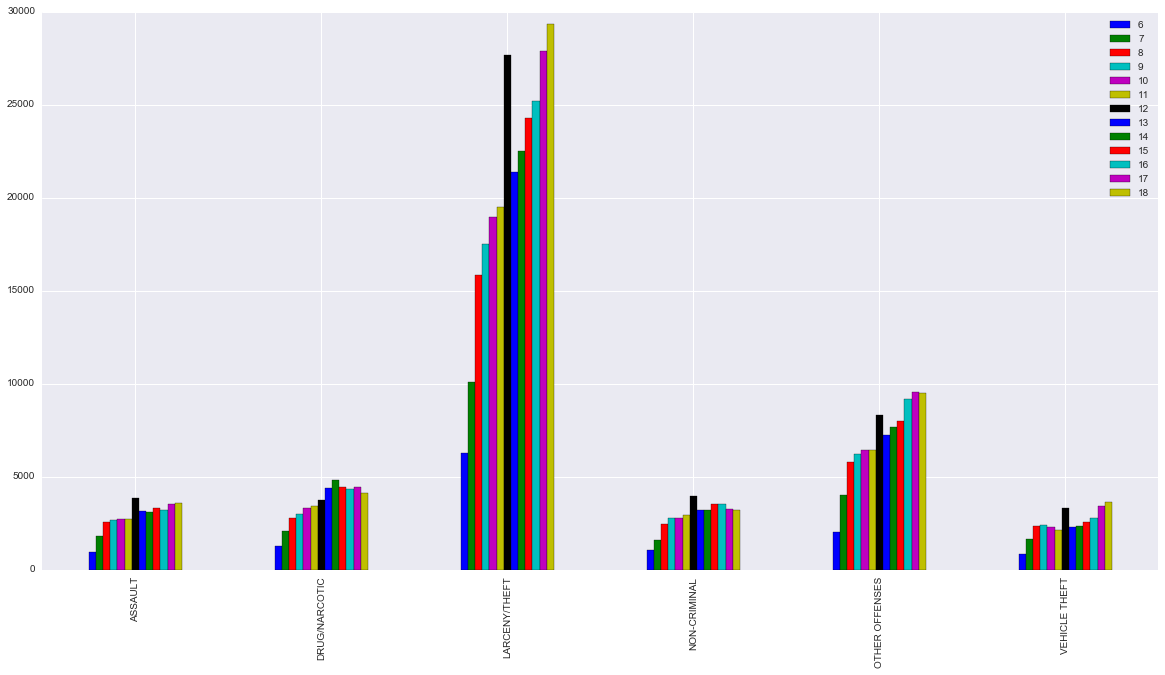

In [19]:
test_pred_day_high.plot(kind='bar', figsize=(20,10))

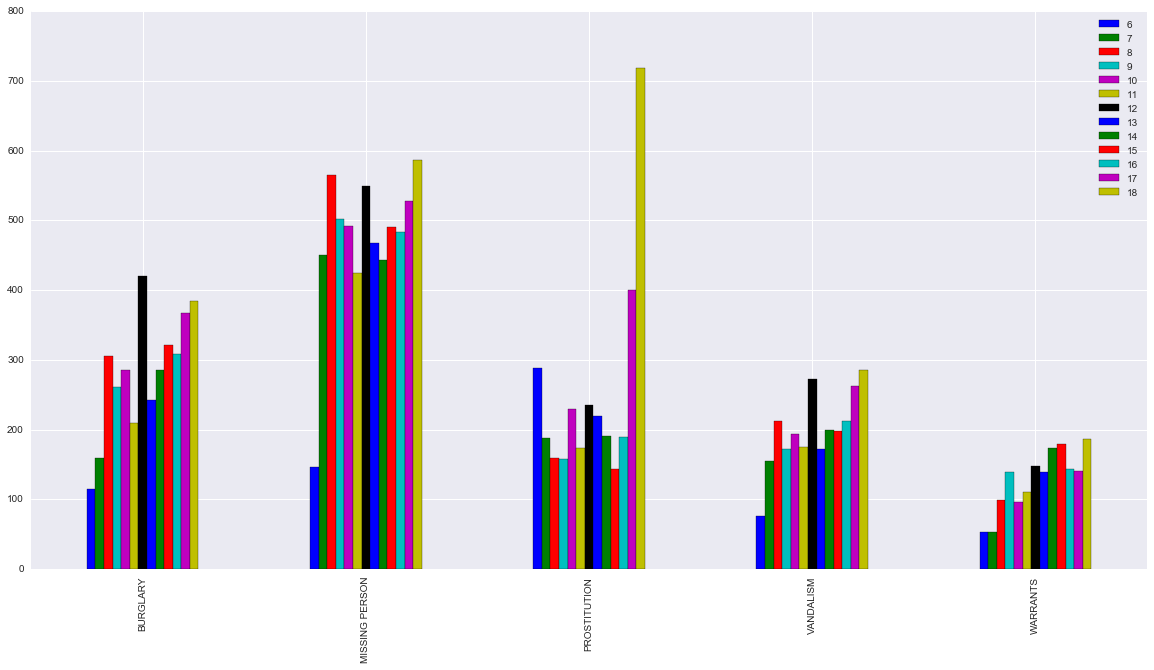

In [20]:
test_pred_day_medium.plot(kind='bar', figsize=(20,10))

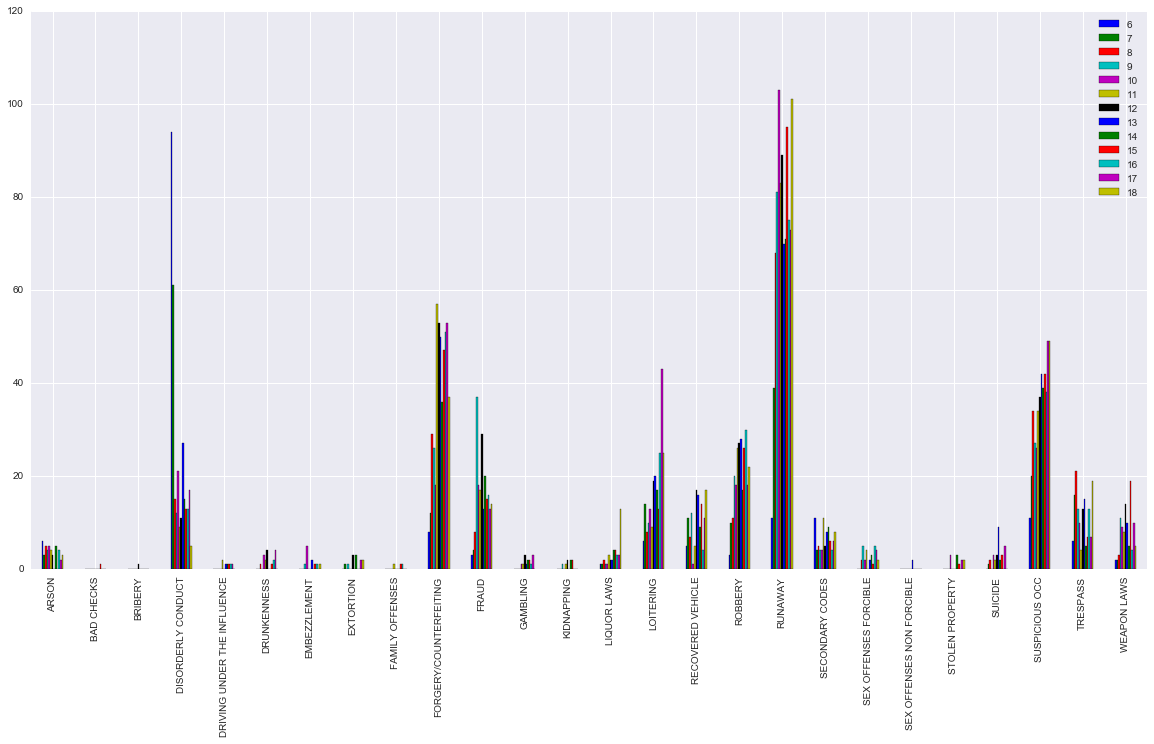

In [21]:
test_pred_day_low.plot(kind='bar', figsize=(20,10))

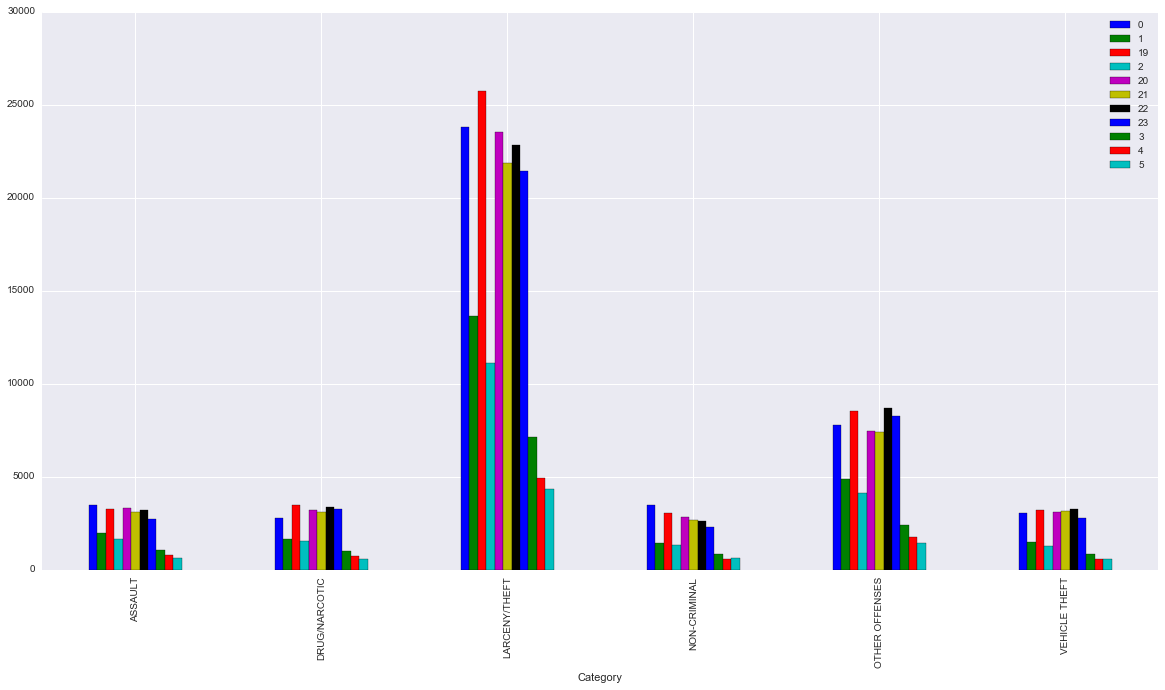

In [22]:
test_pred_night_high.plot(kind='bar', figsize=(20,10))

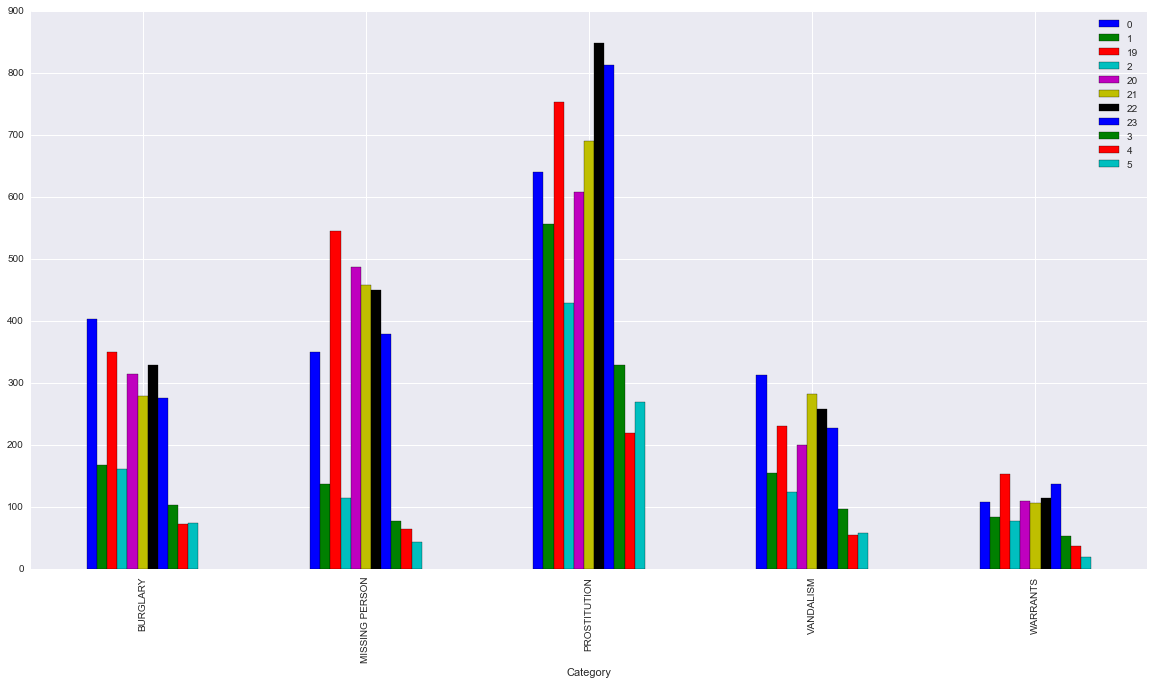

In [23]:
test_pred_night_medium.plot(kind='bar', figsize=(20,10))

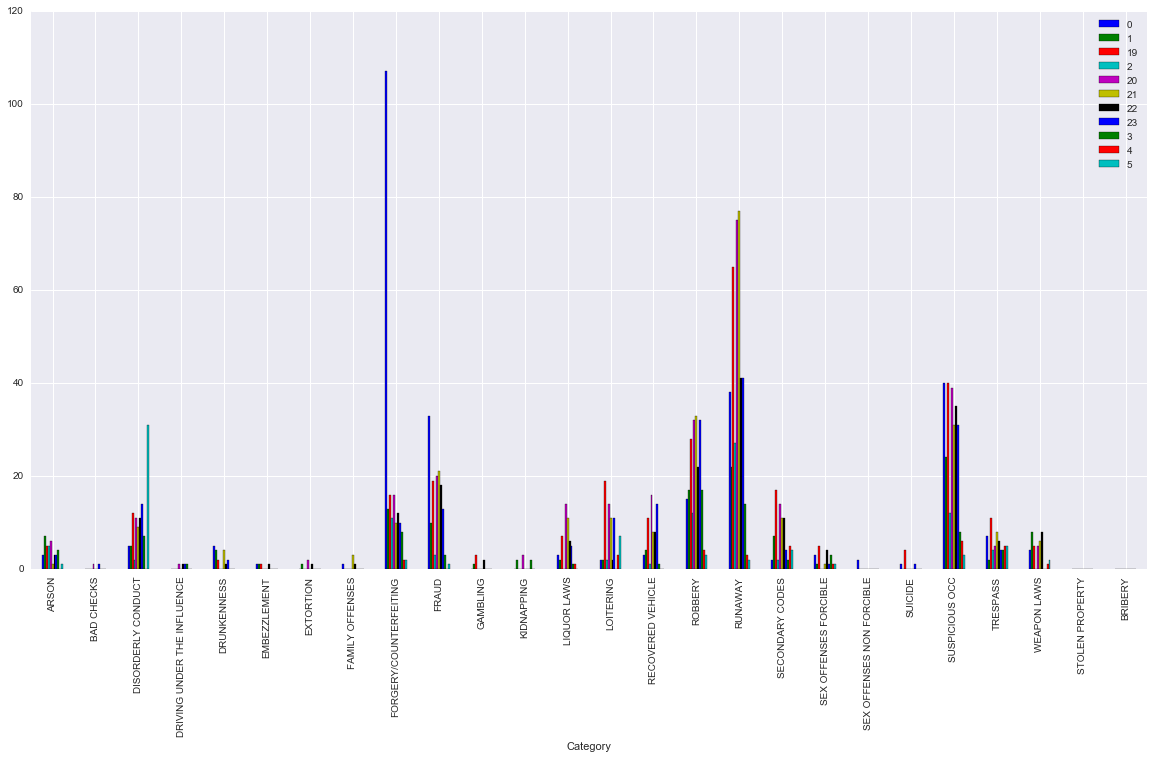

In [24]:
test_pred_night_low.plot(kind='bar', figsize=(20,10))

In [25]:
test_pred_mar = test_pred_mar.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_mar = pd.DataFrame((pd.get_dummies(test_pred_mar, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_mar = test_pred_mar.rename(columns={0:'March'})

test_pred_apr = test_pred_apr.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_apr = pd.DataFrame((pd.get_dummies(test_pred_apr, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_apr = test_pred_apr.rename(columns={0:'April'})

test_pred_may = test_pred_may.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_may = pd.DataFrame((pd.get_dummies(test_pred_may, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_may = test_pred_may.rename(columns={0:'May'})

test_pred_spr = test_pred_mar.join(test_pred_apr).join(test_pred_may)
test_pred_spr = test_pred_spr.fillna(0)

In [26]:
test_pred_jun = test_pred_jun.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_jun = pd.DataFrame((pd.get_dummies(test_pred_jun, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_jun = test_pred_jun.rename(columns={0:'June'})

test_pred_jul = test_pred_jul.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_jul = pd.DataFrame((pd.get_dummies(test_pred_jul, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_jul = test_pred_jul.rename(columns={0:'July'})

test_pred_aug = test_pred_aug.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_aug = pd.DataFrame((pd.get_dummies(test_pred_aug, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_aug = test_pred_aug.rename(columns={0:'August'})

test_pred_sum = test_pred_jun.join(test_pred_jul).join(test_pred_aug)
test_pred_sum = test_pred_sum.fillna(0)

In [27]:
test_pred_sep = test_pred_sep.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_sep = pd.DataFrame((pd.get_dummies(test_pred_sep, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_sep = test_pred_sep.rename(columns={0:'September'})

test_pred_oct = test_pred_oct.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_oct = pd.DataFrame((pd.get_dummies(test_pred_oct, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_oct = test_pred_oct.rename(columns={0:'October'})

test_pred_nov = test_pred_nov.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_nov = pd.DataFrame((pd.get_dummies(test_pred_nov, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_nov = test_pred_nov.rename(columns={0:'November'})

test_pred_fall = test_pred_sep.join(test_pred_oct).join(test_pred_nov)
test_pred_fall = test_pred_fall.fillna(0)

In [28]:
test_pred_dec = test_pred_dec.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_dec = pd.DataFrame((pd.get_dummies(test_pred_dec, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_dec = test_pred_dec.rename(columns={0:'December'})

test_pred_jan = test_pred_jan.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_jan = pd.DataFrame((pd.get_dummies(test_pred_jan, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_jan = test_pred_jan.rename(columns={0:'January'})

test_pred_feb = test_pred_feb.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_feb = pd.DataFrame((pd.get_dummies(test_pred_feb, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_feb = test_pred_feb.rename(columns={0:'February'})

test_pred_win = test_pred_dec.join(test_pred_jan).join(test_pred_feb)
test_pred_win = test_pred_win.fillna(0)

In [29]:
spring = pd.DataFrame(test_pred_spr.T.sum())
spring = spring.rename(columns={0:'Spring'})

summer = pd.DataFrame(test_pred_sum.T.sum())
summer = summer.rename(columns={0:'Summer'})

fall = pd.DataFrame(test_pred_fall.T.sum())
fall = fall.rename(columns={0:'Fall'})

winter = pd.DataFrame(test_pred_win.T.sum())
winter = winter.rename(columns={0:'Winter'})

seasons = spring.join(summer).join(fall).join(winter)
seasons = test_pred_win.fillna(0)

In [30]:
seasons = spring.join(summer).join(fall).join(winter)

In [31]:
def add_crimes(df):
    needed_crimes =[]
    for cat in test_pred.most_likely.unique():
        if cat not in df.index.unique():
            needed_crimes.append(cat)

    df = df.reset_index()
    df = df.rename(columns={'index':'Category'})
    needed_crimes = pd.DataFrame(needed_crimes)
    needed_crimes = needed_crimes.rename(columns={0:'Category'})
    df = df.append(two015)
    df = df.fillna(0)
    df.index = df.pop('Category')
    return df

In [32]:
midnight_to_four = [0, 1, 2, 3]
four_to_eight = [4, 5, 6, 7]
eight_to_twelve = [8, 9, 10, 11]
twelve_to_sixteen = [12, 13, 14, 15]
sixteen_to_twenty = [16, 17, 18, 19]
twenty_to_midnight = [20, 21, 22, 23]

In [33]:
test_pred_mon = test_pred_mon.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_mon = pd.DataFrame((pd.get_dummies(test_pred_mon, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_mon = test_pred_mon.rename(columns={0:'Monday'})

test_pred_tue = test_pred_tue.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_tue = pd.DataFrame((pd.get_dummies(test_pred_tue, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_tue = test_pred_tue.rename(columns={0:'Tuesday'})

test_pred_wed = test_pred_wed.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_wed = pd.DataFrame((pd.get_dummies(test_pred_wed, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_wed = test_pred_wed.rename(columns={0:'Wednesday'})

test_pred_thu = test_pred_thu.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_thu = pd.DataFrame((pd.get_dummies(test_pred_thu, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_thu = test_pred_thu.rename(columns={0:'Thursday'})

test_pred_fri = test_pred_fri.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_fri = pd.DataFrame((pd.get_dummies(test_pred_fri, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_fri = test_pred_fri.rename(columns={0:'Friday'})

test_pred_sat = test_pred_sat.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_sat = pd.DataFrame((pd.get_dummies(test_pred_sat, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_sat = test_pred_sat.rename(columns={0:'Saturday'})

test_pred_sun = test_pred_sun.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_sun = pd.DataFrame((pd.get_dummies(test_pred_sun, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_sun = test_pred_sun.rename(columns={0:'Sunday'})

In [34]:
test_pred_week = test_pred_mon.join(test_pred_tue, how='outer').join(test_pred_wed, how='outer').join(test_pred_thu, how='outer').join(test_pred_fri, how='outer').join(test_pred_sat, how='outer').join(test_pred_sun, how='outer')
test_pred_week = test_pred_week.fillna(0)

In [35]:
test_pred_week

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
ARSON,9,20,8,10,9,5,21
ASSAULT,8722,7014,6750,7082,7841,12021,12708
BAD CHECKS,1,1,1,0,0,0,0
BRIBERY,0,0,1,0,0,0,0
BURGLARY,1120,828,903,847,1729,418,354
DISORDERLY CONDUCT,103,68,67,70,10,59,43
DRIVING UNDER THE INFLUENCE,1,0,1,0,2,4,3
DRUG/NARCOTIC,10199,12224,12868,11475,9239,7358,7441
DRUNKENNESS,5,3,2,0,12,8,5
EMBEZZLEMENT,1,1,2,3,5,3,0


In [36]:
len(test_pred_week)

37

In [37]:
test_pred_week_high = test_pred_week.drop(['ARSON', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'MISSING PERSON', 'PROSTITUTION', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'WARRANTS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_week_medium = test_pred_week.drop(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'ARSON', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_week_low = test_pred_week.drop(['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'MISSING PERSON', 'PROSTITUTION', 'VANDALISM', 'WARRANTS'], axis=0)

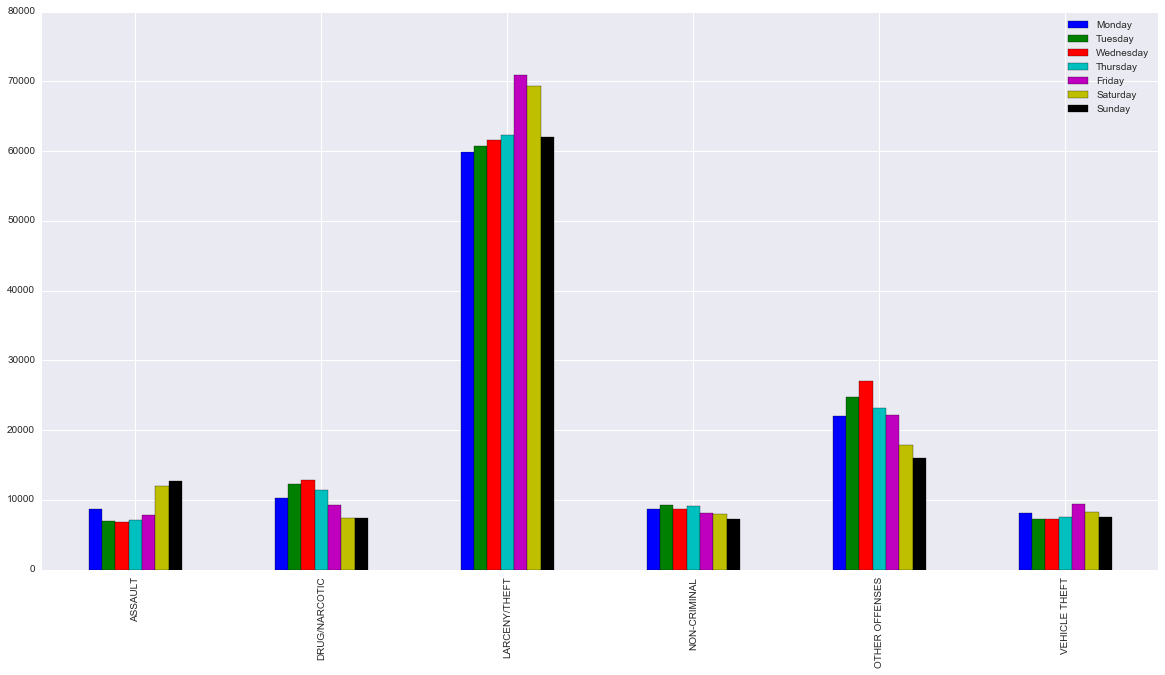

In [38]:
test_pred_week_high.plot(kind='bar', figsize=(20,10))

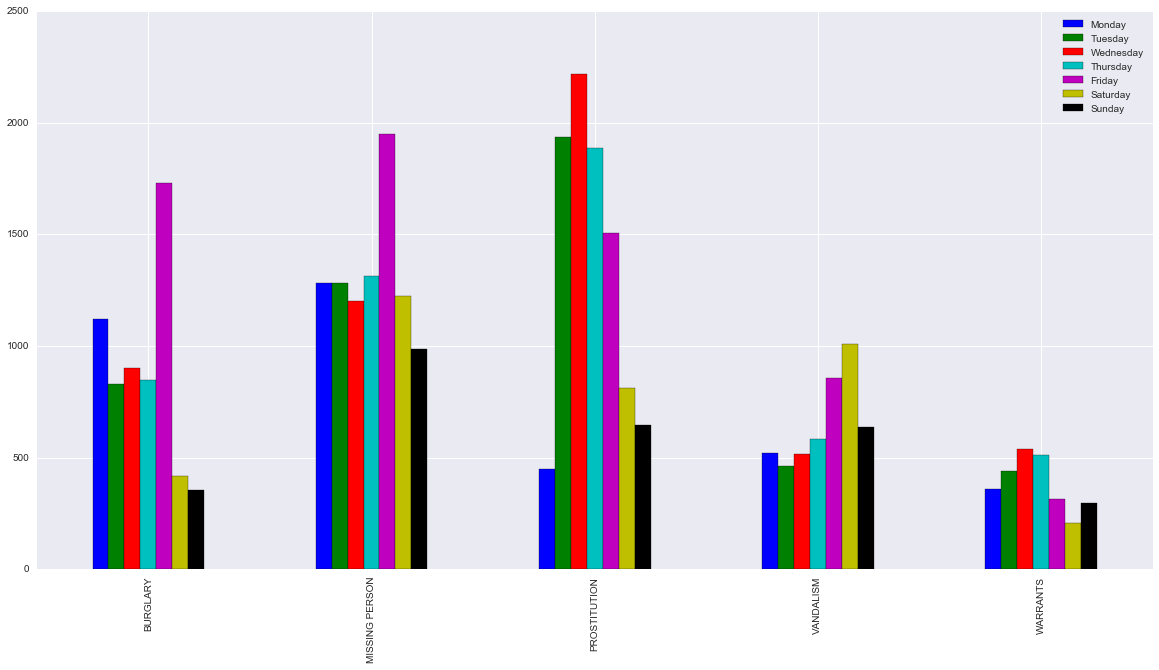

In [39]:
test_pred_week_medium.plot(kind='bar', figsize=(20,10))

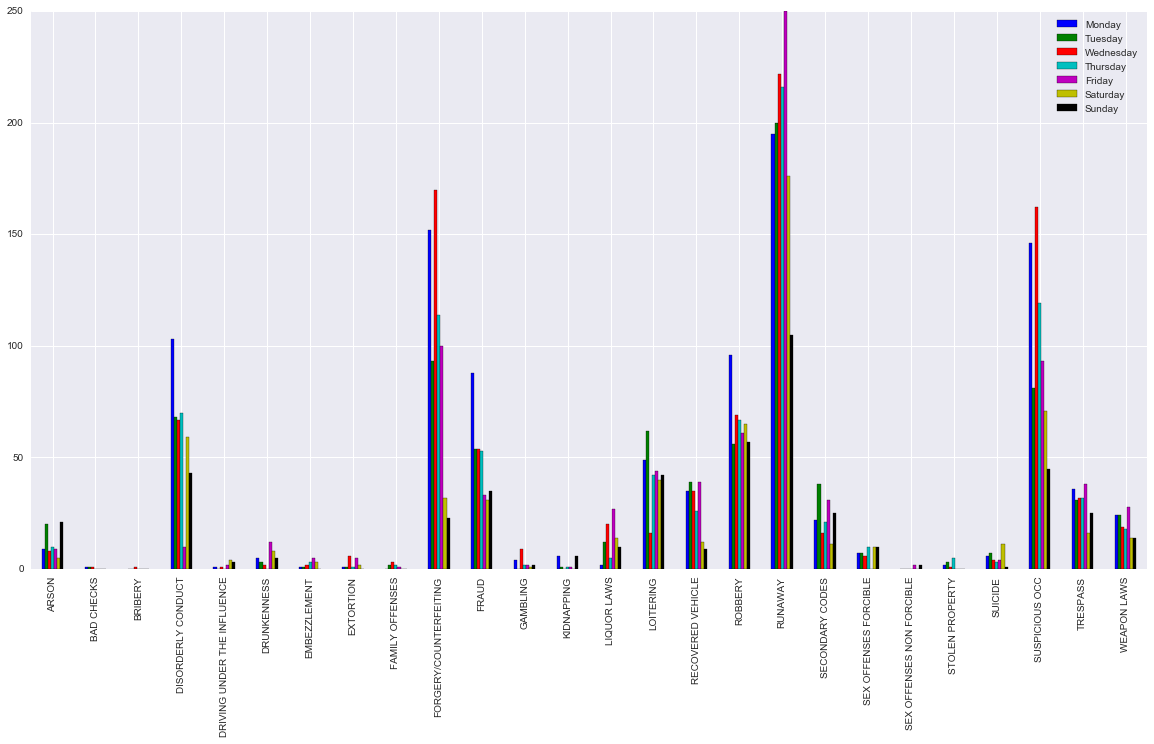

In [40]:
test_pred_week_low.plot(kind='bar', figsize=(20,10))

In [41]:
test_pred_2015 = test_pred_2015.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2015 = pd.DataFrame((pd.get_dummies(test_pred_2015, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2015 = test_pred_2015.rename(columns={0:'2015'})

test_pred_2014 = test_pred_2014.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2014 = pd.DataFrame((pd.get_dummies(test_pred_2014, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2014 = test_pred_2014.rename(columns={0:'2014'})

test_pred_2013 = test_pred_2013.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2013 = pd.DataFrame((pd.get_dummies(test_pred_2013, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2013 = test_pred_2013.rename(columns={0:'2013'})

test_pred_2012 = test_pred_2012.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2012 = pd.DataFrame((pd.get_dummies(test_pred_2012, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2012 = test_pred_2012.rename(columns={0:'2012'})

test_pred_2011 = test_pred_2011.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2011 = pd.DataFrame((pd.get_dummies(test_pred_2011, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2011 = test_pred_2011.rename(columns={0:'2011'})

test_pred_2010 = test_pred_2010.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2010 = pd.DataFrame((pd.get_dummies(test_pred_2010, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2010 = test_pred_2010.rename(columns={0:'2010'})

test_pred_2009 = test_pred_2009.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2009 = pd.DataFrame((pd.get_dummies(test_pred_2009, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2009 = test_pred_2009.rename(columns={0:'2009'})

test_pred_2008 = test_pred_2008.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2008 = pd.DataFrame((pd.get_dummies(test_pred_2008, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2008 = test_pred_2008.rename(columns={0:'2008'})

test_pred_2007 = test_pred_2007.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2007 = pd.DataFrame((pd.get_dummies(test_pred_2007, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2007 = test_pred_2007.rename(columns={0:'2007'})

test_pred_2006 = test_pred_2006.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2006 = pd.DataFrame((pd.get_dummies(test_pred_2006, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2006 = test_pred_2006.rename(columns={0:'2006'})

test_pred_2005 = test_pred_2005.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2005 = pd.DataFrame((pd.get_dummies(test_pred_2005, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2005 = test_pred_2005.rename(columns={0:'2005'})

test_pred_2004 = test_pred_2004.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2004 = pd.DataFrame((pd.get_dummies(test_pred_2004, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2004 = test_pred_2004.rename(columns={0:'2004'})

test_pred_2003 = test_pred_2003.drop(['DayOfWeek', 'Dates', 'highest_probability', 'second_most_likely', 'second_hightest_prob', 'third_most_likely', 'third_highest_prob'], axis=1)
test_pred_2003 = pd.DataFrame((pd.get_dummies(test_pred_2003, columns = ['most_likely'], prefix='',prefix_sep='')).sum())
test_pred_2003 = test_pred_2003.rename(columns={0:'2003'})

In [42]:
two015 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2015.index:
        two015.append(cat)
        
test_pred_2015 = test_pred_2015.reset_index()
test_pred_2015 = test_pred_2015.rename(columns={'index':'Category'})
two015 = pd.DataFrame(two015)
two015 = two015.rename(columns={0:'Category'})
test_pred_2015 = test_pred_2015.append(two015)
test_pred_2015 = test_pred_2015.fillna(0)
test_pred_2015.index = test_pred_2015.pop('Category')

two014 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2014.index:
        two014.append(cat)
        
test_pred_2014 = test_pred_2014.reset_index()
test_pred_2014 = test_pred_2014.rename(columns={'index':'Category'})
two014 = pd.DataFrame(two014)
two014 = two014.rename(columns={0:'Category'})
test_pred_2014 = test_pred_2014.append(two014)
test_pred_2014 = test_pred_2014.fillna(0)
test_pred_2014.index = test_pred_2014.pop('Category')

two013 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2013.index:
        two013.append(cat)
        
test_pred_2013 = test_pred_2013.reset_index()
test_pred_2013 = test_pred_2013.rename(columns={'index':'Category'})
two013 = pd.DataFrame(two013)
two013 = two013.rename(columns={0:'Category'})
test_pred_2013 = test_pred_2013.append(two013)
test_pred_2013 = test_pred_2013.fillna(0)
test_pred_2013.index = test_pred_2013.pop('Category')

two012 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2012.index:
        two012.append(cat)
        
test_pred_2012 = test_pred_2012.reset_index()
test_pred_2012 = test_pred_2012.rename(columns={'index':'Category'})
two012 = pd.DataFrame(two012)
two012 = two012.rename(columns={0:'Category'})
test_pred_2012 = test_pred_2012.append(two012)
test_pred_2012 = test_pred_2012.fillna(0)
test_pred_2012.index = test_pred_2012.pop('Category')

two011 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2011.index:
        two011.append(cat)
        
test_pred_2011 = test_pred_2011.reset_index()
test_pred_2011 = test_pred_2011.rename(columns={'index':'Category'})
two011 = pd.DataFrame(two011)
two011 = two011.rename(columns={0:'Category'})
test_pred_2011 = test_pred_2011.append(two011)
test_pred_2011 = test_pred_2011.fillna(0)
test_pred_2011.index = test_pred_2011.pop('Category')

two010 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2010.index:
        two010.append(cat)
        
test_pred_2010 = test_pred_2010.reset_index()
test_pred_2010 = test_pred_2010.rename(columns={'index':'Category'})
two010 = pd.DataFrame(two010)
two010 = two010.rename(columns={0:'Category'})
test_pred_2010 = test_pred_2010.append(two010)
test_pred_2010 = test_pred_2010.fillna(0)
test_pred_2010.index = test_pred_2010.pop('Category')

two009 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2009.index:
        two009.append(cat)
        
test_pred_2009 = test_pred_2009.reset_index()
test_pred_2009 = test_pred_2009.rename(columns={'index':'Category'})
two009 = pd.DataFrame(two009)
two009 = two009.rename(columns={0:'Category'})
test_pred_2009 = test_pred_2009.append(two009)
test_pred_2009 = test_pred_2009.fillna(0)
test_pred_2009.index = test_pred_2009.pop('Category')

two008 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2008.index:
        two008.append(cat)
        
test_pred_2008 = test_pred_2008.reset_index()
test_pred_2008 = test_pred_2008.rename(columns={'index':'Category'})
two008 = pd.DataFrame(two008)
two008 = two008.rename(columns={0:'Category'})
test_pred_2008 = test_pred_2008.append(two008)
test_pred_2008 = test_pred_2008.fillna(0)
test_pred_2008.index = test_pred_2008.pop('Category')

two007 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2007.index:
        two007.append(cat)
        
test_pred_2007 = test_pred_2007.reset_index()
test_pred_2007 = test_pred_2007.rename(columns={'index':'Category'})
two007 = pd.DataFrame(two007)
two007 = two007.rename(columns={0:'Category'})
test_pred_2007 = test_pred_2007.append(two007)
test_pred_2007 = test_pred_2007.fillna(0)
test_pred_2007.index = test_pred_2007.pop('Category')

two006 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2006.index:
        two006.append(cat)
        
test_pred_2006 = test_pred_2006.reset_index()
test_pred_2006 = test_pred_2006.rename(columns={'index':'Category'})
two006 = pd.DataFrame(two006)
two006 = two006.rename(columns={0:'Category'})
test_pred_2006 = test_pred_2006.append(two006)
test_pred_2006 = test_pred_2006.fillna(0)
test_pred_2006.index = test_pred_2006.pop('Category')

two005 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2005.index:
        two005.append(cat)
        
test_pred_2005 = test_pred_2005.reset_index()
test_pred_2005 = test_pred_2005.rename(columns={'index':'Category'})
two005 = pd.DataFrame(two005)
two005 = two005.rename(columns={0:'Category'})
test_pred_2005 = test_pred_2005.append(two005)
test_pred_2005 = test_pred_2005.fillna(0)
test_pred_2005.index = test_pred_2005.pop('Category')

two004 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2004.index:
        two004.append(cat)
        
test_pred_2004 = test_pred_2004.reset_index()
test_pred_2004 = test_pred_2004.rename(columns={'index':'Category'})
two004 = pd.DataFrame(two004)
two004 = two004.rename(columns={0:'Category'})
test_pred_2004 = test_pred_2004.append(two004)
test_pred_2004 = test_pred_2004.fillna(0)
test_pred_2004.index = test_pred_2004.pop('Category')

two003 =[]
for cat in test_pred.most_likely.unique():
    if cat not in test_pred_2003.index:
        two003.append(cat)
        
test_pred_2003 = test_pred_2003.reset_index()
test_pred_2003 = test_pred_2003.rename(columns={'index':'Category'})
two003 = pd.DataFrame(two003)
two003 = two003.rename(columns={0:'Category'})
test_pred_2003 = test_pred_2003.append(two003)
test_pred_2003 = test_pred_2003.fillna(0)
test_pred_2003.index = test_pred_2003.pop('Category')

test_pred_years = test_pred_2015.join(test_pred_2014).join(test_pred_2013).join(test_pred_2012).join(test_pred_2011).join(test_pred_2010).join(test_pred_2009).join(test_pred_2008).join(test_pred_2007).join(test_pred_2006).join(test_pred_2005).join(test_pred_2004).join(test_pred_2003)
test_pred_years = test_pred_week.fillna(0)

In [43]:
test_pred_years = test_pred_2015.join(test_pred_2014).join(test_pred_2013).join(test_pred_2012).join(test_pred_2011).join(test_pred_2010).join(test_pred_2009).join(test_pred_2008).join(test_pred_2007).join(test_pred_2006).join(test_pred_2005).join(test_pred_2004).join(test_pred_2003)

In [44]:
test_pred_years_high = test_pred_years.drop(['ARSON', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'MISSING PERSON', 'PROSTITUTION', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'VANDALISM', 'WARRANTS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_years_medium = test_pred_years.drop(['ASSAULT', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'ARSON', 'DISORDERLY CONDUCT', 'DRUNKENNESS', 'EMBEZZLEMENT', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'ROBBERY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SUSPICIOUS OCC', 'TRESPASS', 'WEAPON LAWS', 'FORGERY/COUNTERFEITING', 'RUNAWAY', 'LIQUOR LAWS', 'EXTORTION', 'FAMILY OFFENSES', 'RECOVERED VEHICLE', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'STOLEN PROPERTY', 'SUICIDE', 'BRIBERY', 'SEX OFFENSES NON FORCIBLE', 'BAD CHECKS'])
test_pred_years_low = test_pred_years.drop(['ASSAULT', 'BURGLARY', 'DRUG/NARCOTIC', 'LARCENY/THEFT', 'NON-CRIMINAL', 'OTHER OFFENSES', 'VEHICLE THEFT', 'MISSING PERSON', 'PROSTITUTION', 'VANDALISM', 'WARRANTS'], axis=0)

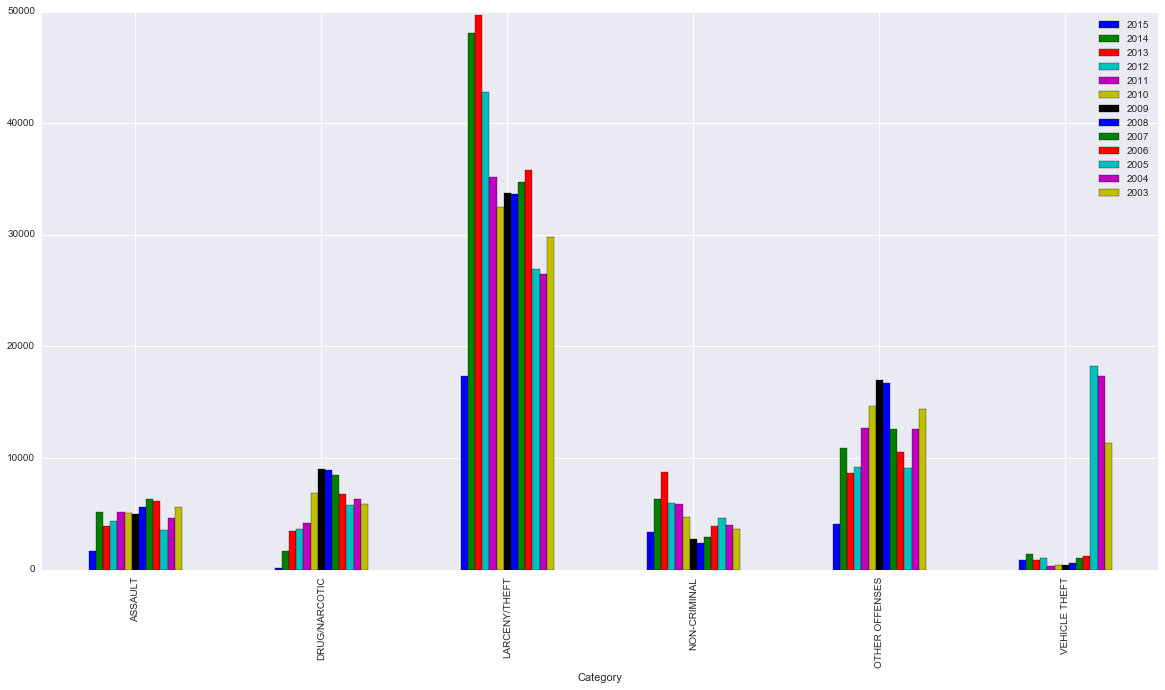

In [45]:
test_pred_years_high.plot(kind='bar', figsize=(20,10))

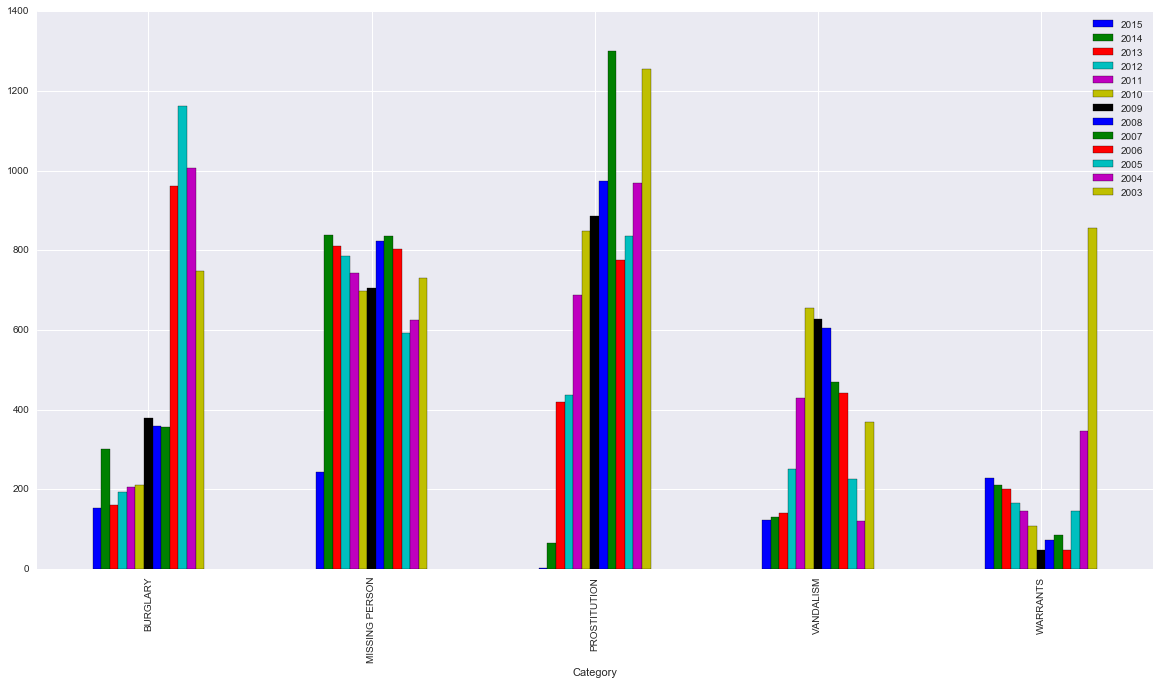

In [46]:
test_pred_years_medium.plot(kind='bar', figsize=(20,10))

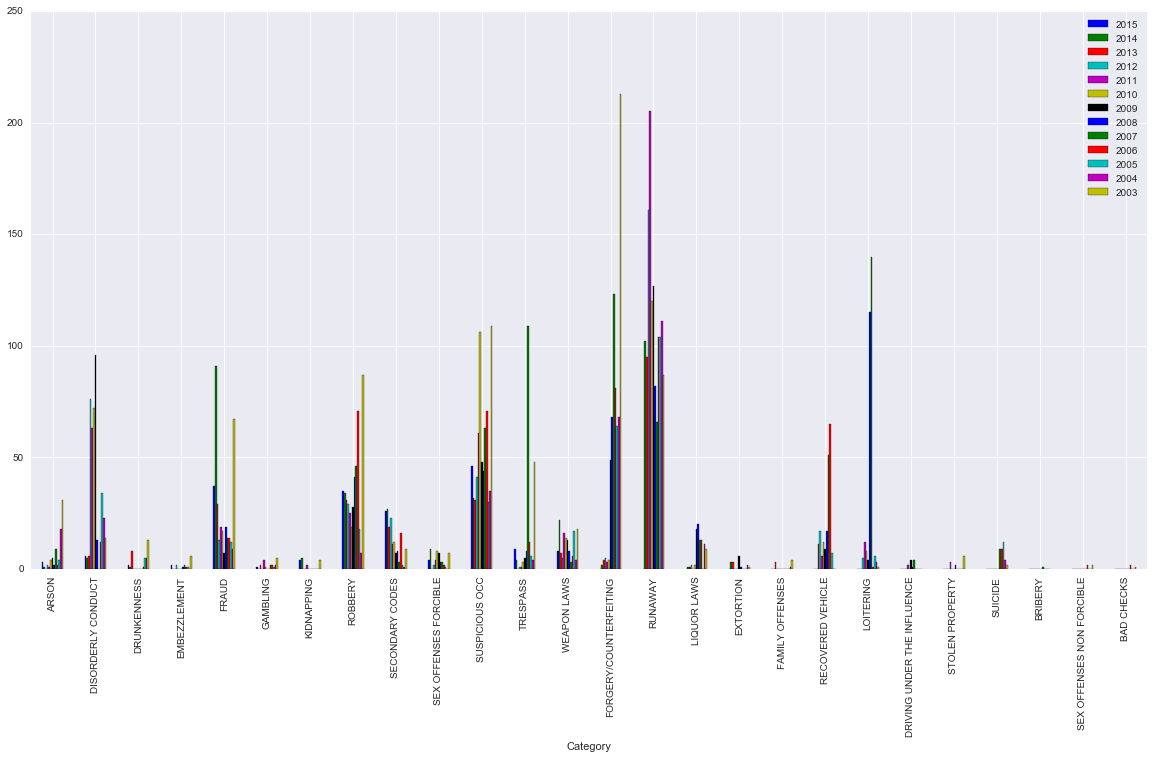

In [47]:
test_pred_years_low.plot(kind='bar', figsize=(20,10))

In [61]:
test_pred_sex_crimes.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_sex_crimes.csv')
test_pred_theft.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_theft.csv')
test_pred_misc_lesser.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_misc_lesser.csv')
test_pred_other_offenses = test_pred_other_offenses.sort(ascending=False)
test_pred_other_offenses.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_other_offenses.csv')
test_pred_violent.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_violent.csv')
test_pred_controlled_substances_alchohol.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_controlled_substances_alchohol.csv')
test_pred_missing.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_missing.csv')
test_pred_financial.to_csv('/Users/MatthewBarnette/final_project_predictions//test_pred_financial.csv')

/Users/MatthewBarnette/final_project_2/.direnv/python-3.5.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)
